In [90]:
get_ipython().ast_node_interactivity = 'all'
import pandas 
import numpy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

credit = pandas.read_csv("creditCardDefault.csv")
#credit = credit.sample(frac=0.5, random_state=42)

## The Usual

Copy script from last time to
- Import data
- Split into test/train
- Create pipes for preprocessing

Features:
- Numeric `['Limit_Bal','Age','Bill_Amt1','Pay_Amt1']`


- Categorical `['Card', 'Marriage', 'Pay_0']`

In [1]:
credit[ ['Limit_Bal', 'Age', 'Bill_Amt1', 'Pay_Amt1', 'Card', 'Marriage', 'Pay_0', 'Payment'] ].dtypes

numpy.random.seed(28)
X = credit[ ['Limit_Bal', 'Age', 'Bill_Amt1', 'Pay_Amt1', 'Card', 'Marriage', 'Pay_0'] ]
y = credit.Payment
X_train, X_test, y_train, y_test = train_test_split(credit, credit.Payment, test_size = .50)


#it is efficient to make a list of 
lstNum = ['Limit_Bal','Age','Bill_Amt1','Pay_Amt1']
lstCat = ['Card', 'Marriage','Pay_0']


pipeNum = Pipeline( [
    ('selector', ColumnTransformer([ ('selector', 'passthrough', lstNum ) ] )),
    ('scaler', StandardScaler())
])


#the column transformer only accept one type of column variable, you need either numerical or categorical
pipeCat = Pipeline([
('selector', ColumnTransformer([ ('selector', 'passthrough', lstCat ) ] )),
('encoder', OneHotEncoder( dtype=int, drop='first', sparse_output = False ) ) ])
pipeCat


preprocessor = FeatureUnion([
    ('cat', pipeCat), 
    ('num', pipeNum)])



NameError: name 'credit' is not defined

## Decision Trees

Make a pipeline that uses `DecisionTreeClassifier` from the `sklearn.tree` package

In [35]:
pipeDt = Pipeline([ 
    ('preprocessor', preprocessor), 
    ('model', DecisionTreeClassifier())
], verbose=True)

#### Training Data
Fit, predict, assess 
- Fit the decision tree model on the training data.
- Use the fitted model to predict values in training and in test.
- Assess the fit in training.
- Look at the classification report.
- Check the confusion matrix.

In [36]:

#fit based off training data
pipeDt.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.1s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', DecisionTreeClassifier())],
         verbose=True)

In [37]:
predTrainDt = pipeDt.predict( X_train ) 
#
predTestDt = pipeDt.predict(X_test)

In [38]:
#overfitting the model, we're only memorizing the factors that currently lead to the values being predicted. 
print( sklearn.metrics.classification_report( y_train, predTrainDt ) ) 

              precision    recall  f1-score   support

      Missed       0.99      1.00      1.00      3384
        Paid       1.00      1.00      1.00     11616

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



Trees can be plotted
- Use the `plot_tree` function in `sklearn.tree` to see the decision tree.

<Figure size 1200x1200 with 0 Axes>

<Figure size 2000x1400 with 0 Axes>

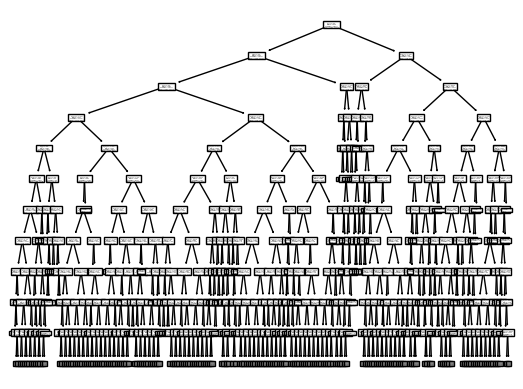

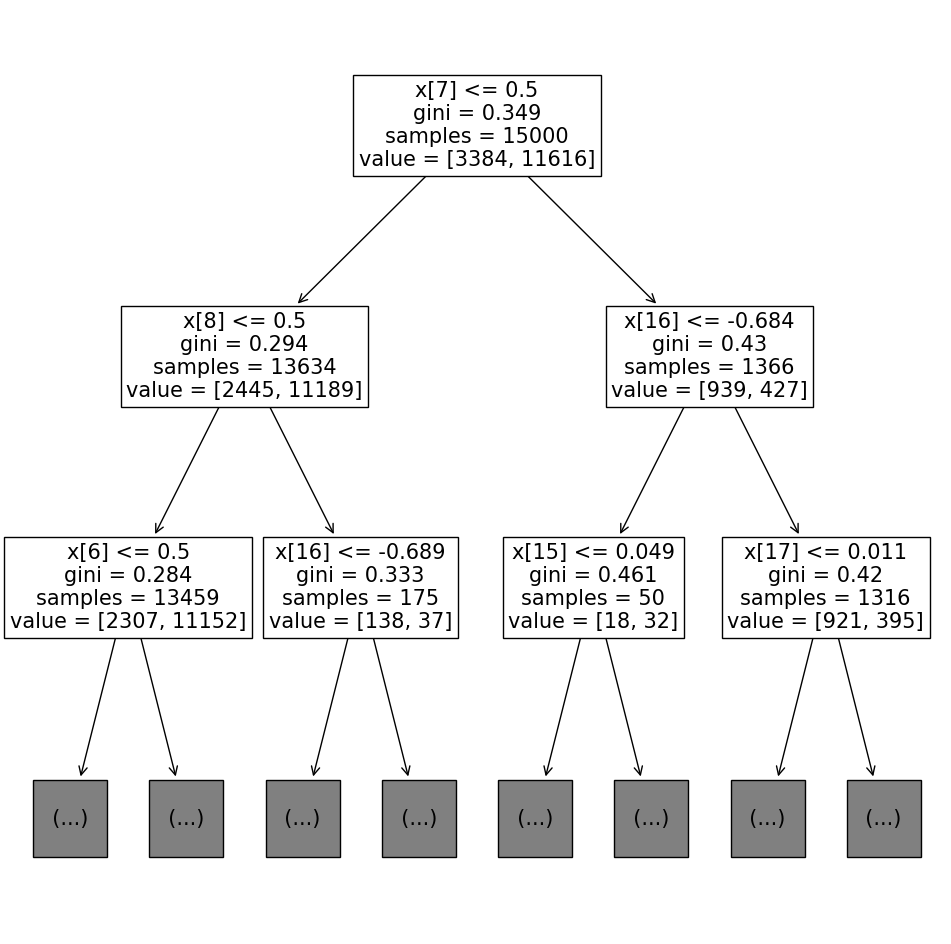

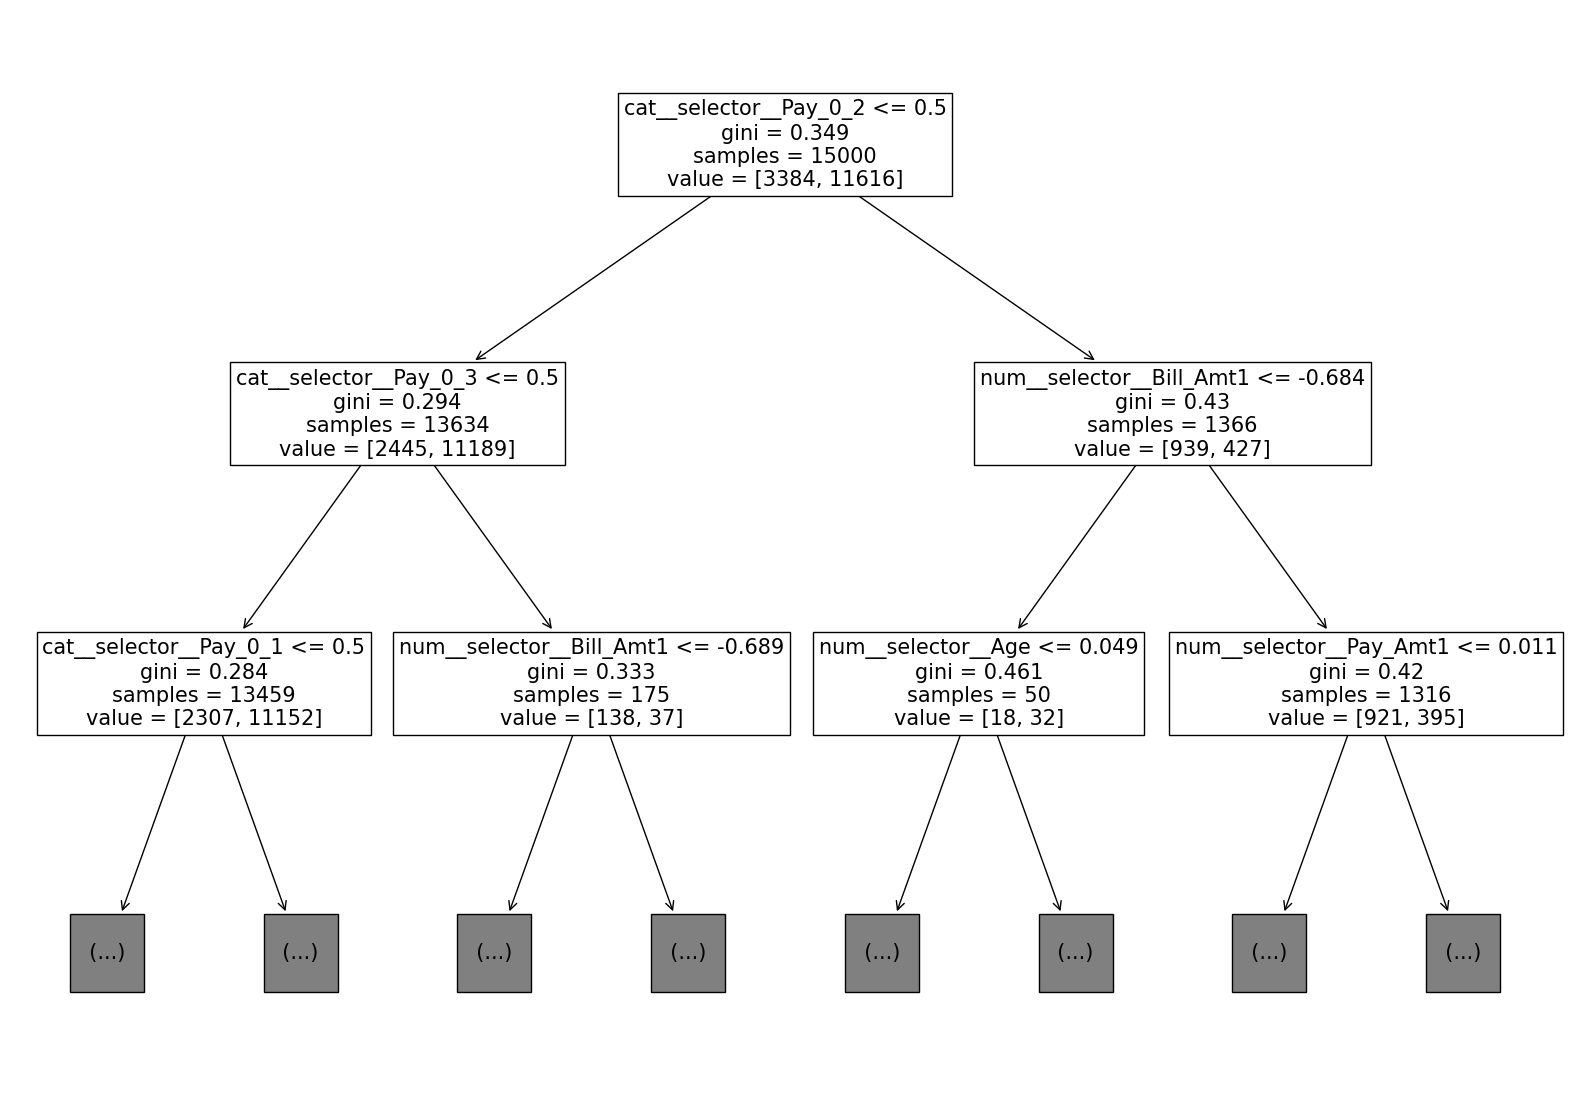

In [40]:
plotTree = plot_tree( pipeDt['model'], max_depth=10)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12))
plotTree = plot_tree( pipeDt['model'], max_depth=2, fontsize=15)


tempFeatures = pipeDt[:-1].get_feature_names_out().tolist()
plt.figure(figsize=(20,14))
plotTree = plot_tree( pipeDt['model'], max_depth=2, fontsize=15, feature_names=tempFeatures)


#### Testing data
- Check the fit in the testing data.
- Classification report for test data.
- Confusion matrix for test data.

<Figure size 2000x1400 with 0 Axes>

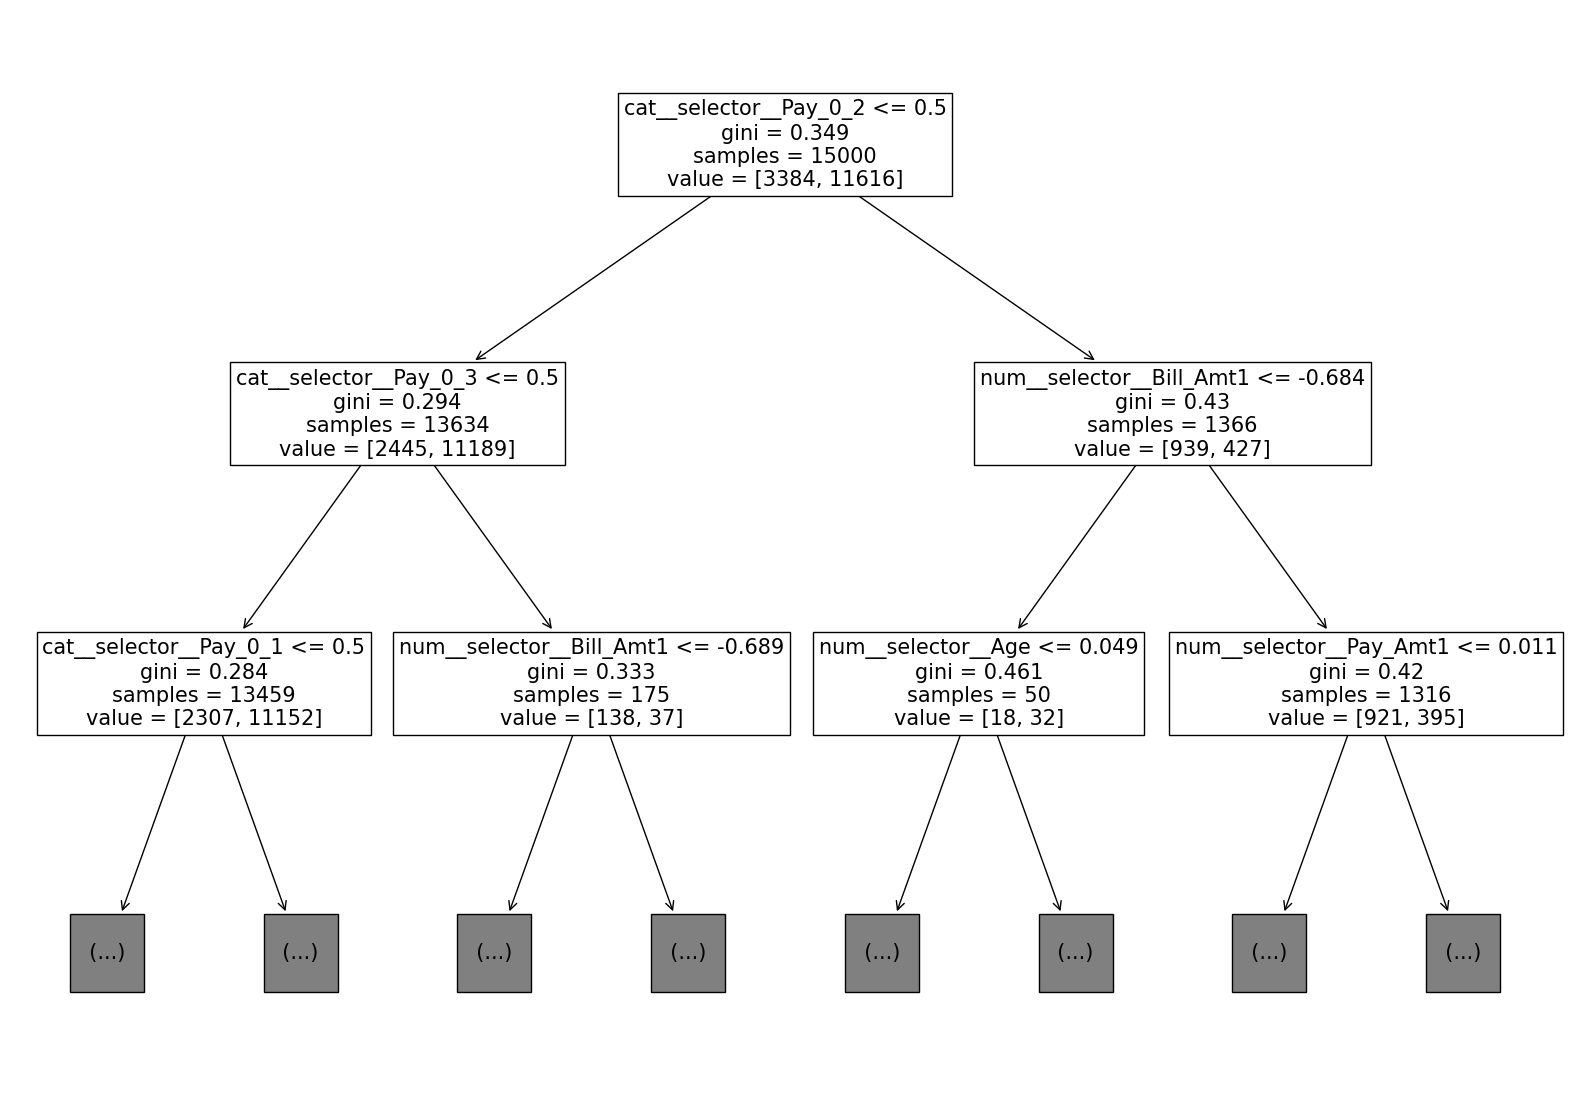

In [41]:
#so we can see the names and understand the logical conclusions more clearly.

tempFeatures = pipeDt[:-1].get_feature_names_out().tolist()
plt.figure(figsize=(20,14))
plotTree = plot_tree( pipeDt['model'], max_depth=2, fontsize=15, feature_names=tempFeatures)


In [42]:
print( sklearn.metrics.classification_report( y_train, predTrainDt ) ) 

              precision    recall  f1-score   support

      Missed       0.99      1.00      1.00      3384
        Paid       1.00      1.00      1.00     11616

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



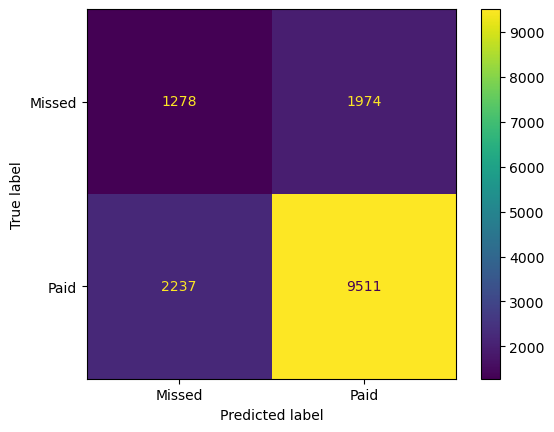

In [45]:
cmDt = sklearn.metrics.confusion_matrix(y_test , predTestDt ) 
plotDt = sklearn.metrics.ConfusionMatrixDisplay (cmDt , display_labels=pipeDt.classes_ ).plot()

## Bagged Trees

In [ ]:
#IMPLEMENT BAGGING

In [46]:
pipeBagDt = Pipeline([ 
    ('preprocessor', preprocessor),
    ('model', BaggingClassifier(DecisionTreeClassifier()))
], verbose=True)

Fit and predict.

In [47]:
pipeBagDt.fit(X_train, y_train)

predTrainBagDt = pipeBagDt.predict( X_train ) 

predTesBagtDt = pipeBagDt.predict(X_test)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.7s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model',
                 BaggingClassifier(estimator=DecisionTreeClassifier()))],
         verbose=True)

In [48]:
print( sklearn.metrics.classification_report( y_train, predTrainBagDt ) ) 

              precision    recall  f1-score   support

      Missed       0.97      0.96      0.97      3384
        Paid       0.99      0.99      0.99     11616

    accuracy                           0.99     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.99      0.99      0.99     15000



In [49]:
print( sklearn.metrics.classification_report( y_test, predTrainBagDt ) ) 

              precision    recall  f1-score   support

      Missed       0.22      0.22      0.22      3252
        Paid       0.78      0.78      0.78     11748

    accuracy                           0.66     15000
   macro avg       0.50      0.50      0.50     15000
weighted avg       0.66      0.66      0.66     15000



## Random Forests

In [50]:
pipeRf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
], verbose=True)

Fit and predict.

In [51]:
pipeRf.fit( X_train, y_train )
predTrainRf = pipeRf.predict( X_train )
predTestRf = pipeRf.predict( X_test )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.9s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', RandomForestClassifier())],
         verbose=True)

Assess fit.

In [60]:
sklearn.metrics.balanced_accuracy_score( y_test, predTrainRf ) 

0.49841018711514995

In [57]:
print( sklearn.metrics.classification_report( y_train, predTrainRf ) ) 

              precision    recall  f1-score   support

      Missed       1.00      0.99      1.00      3384
        Paid       1.00      1.00      1.00     11616

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000



In [59]:
sklearn.metrics.balanced_accuracy_score( y_train, predTrainRf ) 

0.9959431720493133

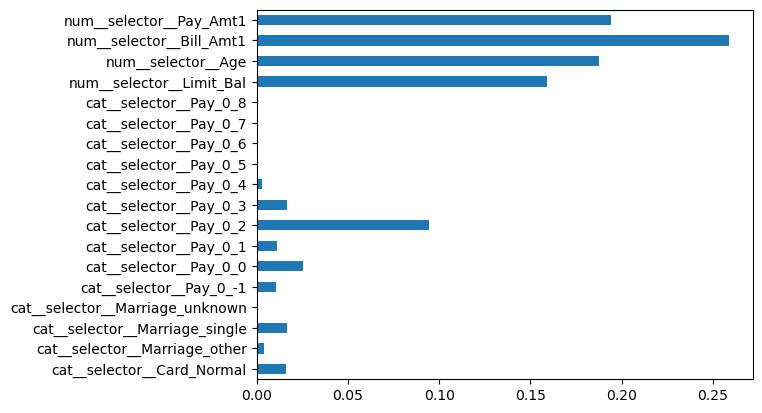

In [61]:
#feature importances is an attribute that records how often the variables
#are used in our model

#this graph is a good representation of what variables matter

rfBar = pandas.Series( pipeRf[ "model" ].feature_importances_, index=pipeRf[:-1].get_feature_names_out() ).plot.barh()

## Boosted Trees

#### AdaBoost

In [62]:
pipeAda = Pipeline([
 ('preprocessor', preprocessor),
 ('model', AdaBoostClassifier())
], verbose=True)

Fit and predict.

In [63]:
pipeAda.fit( X_train, y_train )
predTrainAda = pipeAda.predict( X_train )
predTestAda = pipeAda.predict( X_test )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.0s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', AdaBoostClassifier())],
         verbose=True)

Assess fit in training.

In [64]:
sklearn.metrics.balanced_accuracy_score( y_train, predTrainDt )
sklearn.metrics.balanced_accuracy_score( y_train, predTrainBagDt )
sklearn.metrics.balanced_accuracy_score( y_train, predTrainRf )
sklearn.metrics.balanced_accuracy_score( y_train, predTrainAda )

0.997556867026161

0.9772321254127347

0.9959431720493133

0.6484697067385655

Assess fit in testing.

In [66]:
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )

0.6012867700178535

0.6451738036277196

0.6451736465781409

#### Gradient Boost

In [67]:
#gradient descent


pipeGbA = Pipeline([
 ('preprocessor', preprocessor),
 ('model', GradientBoostingClassifier())
], verbose=True )

Fit and predict.

In [91]:
pipeGbA.fit( X_train, y_train )
predTrainGbA = pipeGba.predict( X_train )
predTestGbA = pipeGba.predict( X_test )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.0s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', GradientBoostingClassifier())],
         verbose=True)

NameError: name 'pipeGba' is not defined

Assess fit in training.

In [70]:
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )
#a strong model, but not as good as Rf. 

#XG Boost is a very strong model and usually wins these sorts of contests. 

sklearn.metrics.balanced_accuracy_score( y_test, predTestGbA )

0.6012867700178535

0.6451738036277196

0.6451736465781409

0.6451736465781409

Assess fit in testing.

## Hyperparameters

Changing the learning rate.

In [79]:
pipeGbB = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingClassifier(learning_rate = 0.6))
], verbose=True)


In [80]:
pipeGbB.fit( X_train, y_train )


[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.1s


Pipeline(steps=[('preprocessor',
                 FeatureUnion(transformer_list=[('cat',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Card',
                                                                                                    'Marriage',
                                                                                                    'Pay_0'])])),
                                                                 ('encoder',
                                                                  OneHotEncoder(drop='first',
                                                                                dtype=<class 'int'>,
                                                                                sparse_output=False))])),
                                                ('num',
                                                 Pipeline(steps=[('selector',
                                                                  ColumnTransformer(transformers=[('selector',
                                                                                                   'passthrough',
                                                                                                   ['Limit_Bal',
                                                                                                    'Age',
                                                                                                    'Bill_Amt1',
                                                                                                    'Pay_Amt1'])])),
                                                                 ('scaler',
                                                                  StandardScaler())]))])),
                ('model', GradientBoostingClassifier(learning_rate=0.6))],
         verbose=True)

In [92]:
predTrainGbB = pipeGbB.predict( X_train )
predTestGbB = pipeGbB.predict( X_test )

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.1s
[CV 1/5] END model__learning_rate=0, model__max_depth=1;, score=0.774 total time=   1.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.5s
[CV 5/5] END model__learning_rate=0, model__max_depth=3;, score=0.775 total time=   2.5s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   8.0s
[CV 2/5] END model__learning_rate=0, model__max_depth=9;, score=0.774 total time=   8.1s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   2.8s
[CV 5/5] END model__learning_rate=0.15, model__max_depth=3;, score=0.812 total time=   2.8s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[P

In [84]:
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )
sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )
#a strong model, but not as good as Rf. 

#XG Boost is a very strong model and usually wins these sorts of contests. 

sklearn.metrics.balanced_accuracy_score( y_test, predTestGbA )
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbB )

0.6012867700178535

0.6451738036277196

0.6451736465781409

0.6451736465781409

0.6399329021380101

#### Grid search space

In [87]:
paramGridGbA = {'model__learning_rate': [ 0, 0.15, 0.3, 0.45, 0.6, 0.75 ],
    'model__max_depth': [1, 3, 6, 9]
    }
    
#BE very mindful of what we use for the dictionary

#### Crossfolds

In [88]:
gridGbAAccuracy = GridSearchCV( pipeGbA, paramGridGbA, cv=5, n_jobs=-1, verbose=4)

In [89]:
gridGbAAccuracy.fit( X_train, y_train )
gridGbAAccuracy.best_params_ 
gridGbAAccuracy.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.8s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        FeatureUnion(transformer_list=[('cat',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnTransformer(transformers=[('selector',
                                                                                                                          'passthrough',
                                                                                                                          ['Card',
                                                                                                                           'Marriage',
                                                                                                                           'Pay_0'])])),
                                                                                        ('encoder',
                                                                                         OneHotEncoder(drop='first',
                                                                                                       dtype=<class 'int'>,
                                                                                                       sparse_output=False))])),
                                                                       ('num',
                                                                        Pipeline(steps=[('selector',
                                                                                         ColumnTransformer(transformers=[('selector',
                                                                                                                          'passthrough',
                                                                                                                          ['Limit_Bal',
                                                                                                                           'Age',
                                                                                                                           'Bill_Amt1',
                                                                                                                           'Pay_Amt1'])])),
                                                                                        ('scaler',
                                                                                         StandardScaler())]))])),
                                       ('model', GradientBoostingClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0, 0.15, 0.3, 0.45, 0.6,
                                                  0.75],
                         'model__max_depth': [1, 3, 6, 9]},
             verbose=4)

{'model__learning_rate': 0.3, 'model__max_depth': 1}

0.8164666666666666

In [94]:
pipeGbA = Pipeline([
    ('preprocessor', preprocessor ),
    ('model', GradientBoostingClassifier() )
], verbose=True )

sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )

sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbA )

0.6012867700178535

0.6451738036277196

0.6451736465781409

0.6451736465781409

In [96]:
gridGbAAccuracy.best_estimator_.predict(X_train)
predTrainGbAT = gridGbAAccuracy.best_estimator_.predict(X_train)
predTestGbAT = gridGbAAccuracy.best_estimator_.predict(X_test)
sklearn.metrics.balanced_accuracy_score( y_test, predTestDt )

sklearn.metrics.balanced_accuracy_score( y_test, predTestRf )
sklearn.metrics.balanced_accuracy_score( y_test, predTestAda )
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbA )
sklearn.metrics.balanced_accuracy_score( y_test, predTestGbAT )

array(['Paid', 'Paid', 'Paid', ..., 'Paid', 'Paid', 'Paid'], dtype=object)

0.6012867700178535

0.6451738036277196

0.6451736465781409

0.6451736465781409

0.6433328684665804

## Practice